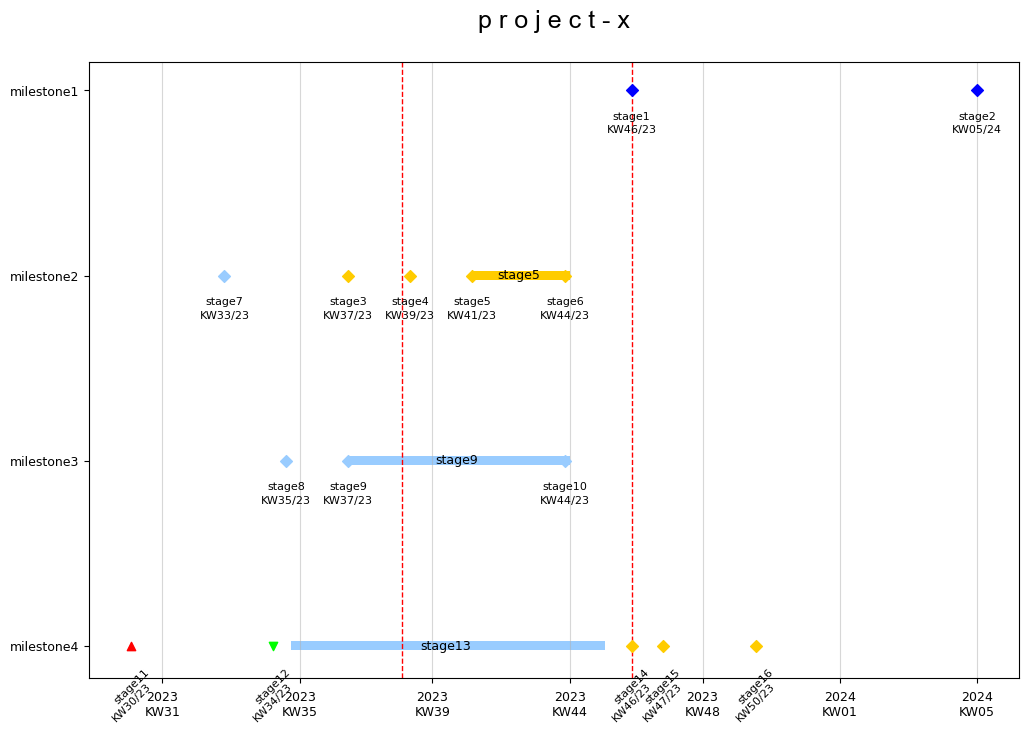

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#python excel to gantt chart 
#by caijunling@csvw.com
# Function to plot the timeline based on DataFrame 'df'
def plot_timeline(df, ax):
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        # Convert the 'start' date to a numeric value for plotting
        start_num = mdates.date2num(row['start'])
        text_offset = 15
        
        # Check the shape type for the current row
        if row['shape'] == 'point':
            # If it's a 'point', call the plot_scatter function
            plot_scatter(row['start'], row['ms'], row['events'], row['week_year_str'], row['color'], row['marker'], row['rotation'])
        else:
            # If it's not a 'point', assume it's a 'bar'
            # Plot a horizontal bar and annotate it
            plt.barh(y=row['ms'], width=row['task_duration'], left=mdates.date2num(row['start']),
                     height=0.05, color=row['color'])
            progress_bar_length = (row['end'] - row['start']).days
            offset = progress_bar_length / 2
            plt.text(start_num + offset, row['ms'], row['events'], ha='center', va='center')

# Function to plot a scatter point with annotations
def plot_scatter(start, ms, events, week_year_str, color, marker, rotation):
    text_offset = 15
    text_offset_task = 45
    
    # Plot a scatter point with specified properties
    plt.scatter(mdates.date2num(start), ms, marker=marker, color=color, zorder=10)
    
    # Annotate the scatter point with event and week/year information
    plt.annotate(events, xy=(start, ms), xytext=(0, -text_offset),
                 textcoords='offset points', ha='center', va='top', fontsize=8, 
                 rotation=rotation)
    plt.annotate(week_year_str, xy=(start, ms), xytext=(0, -text_offset-10), textcoords='offset points',
                 ha='center', va='top', fontsize=8, rotation=rotation)

# Function to create and configure the plot
def create_plot():
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    
    # Define font settings
    font_dict = {
        'font.sans-serif': 'Arial',
        'font.size': 9
    }
    plt.rcParams.update(font_dict)
    
    # Configure the x-axis with date formatting
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%G\nKW%V'))
    
    # Adjust tick parameters and grid
    ax.tick_params(axis='x', which='major', pad=5, labelsize=9)
    ax.xaxis.grid(True, alpha=0.5)
    
    return ax

# Function to plot configuration based on DataFrame 'df'
def plot_conf(df, ax):
    # Extract and format the title
    title = df['title'].iloc[0]
    title_str = ' '.join(title)
    
    # Set the plot title and adjust y-axis direction
    plt.title(title_str, fontsize=18, pad=25, fontdict={'fontfamily': 'Arial'})
    plt.gca().invert_yaxis()

# Function to draw vertical lines on the plot
def draw_vertical_lines(df, ax):
    today = datetime.date.today()
    line2_date = df['line2'].max().date().strftime('%Y-%m-%d')  
    line2 = datetime.datetime.strptime(line2_date, '%Y-%m-%d').date()
    
    today_formatted = mdates.date2num(today)
    line2_formatted = mdates.date2num(line2)
    
    # Draw vertical dashed lines at today's date and line2 date
    ax.axvline(today_formatted, color='red', linestyle='dashed', linewidth=1)
    ax.axvline(line2_formatted, color='red', linestyle='dashed', linewidth=1)


def main():
    try:
        df = pd.read_excel('gantt.xlsx', sheet_name='Sheet1')
        df['days_to_start'] = (df['start'] - df['start'].min()).dt.days
        df['days_to_end'] = (df['end'] - df['start'].min()).dt.days
        df['task_duration'] = df['days_to_end'] - df['days_to_start'] + 1
        df['week_year_str'] = df['start'].dt.strftime('KW%W/%y')
        df['rotation'] = df['rotation'].astype(int)
        ax = create_plot()
        plot_conf(df, ax)
        plot_timeline(df, ax)
        draw_vertical_lines(df, ax)
        plt.show()
    except Exception as e:
        print("Error occurred:", str(e))      
        
if __name__ == "__main__":
    main()
